## 공공데이터를 이용한 카페 상권분석(2022 Ver.)


**들어가며**

- 공공데이터를 통해 대한민국을 이해해봅시다(?).
- 공공데이터포털(data.go.kr)에 다양한 데이터가 공개되어 있습니다.
- 그 중에 카페(라는 업종분류)들에 대해서 현황을 조사하려고 합니다.

**명세사항**
1. 전국 카페 데이터를 모두 수집해야합니다.
2. 지역별 or 브랜드별 점포 현황을 확인합니다.
3. 분석 결과를 시각화합니다. 

## 0. Data Description

- 소상공인 상권 데이터를 국내에 있는 모든 소상공인으로 등록된 점포들에 대한 정보를 제공합니다.

[데이터] https://www.data.go.kr/data/15083033/fileData.do

In [3]:
# 라이브러리를 불러옵니다.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from glob import glob
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1. 데이터 불러오기

In [6]:
# 다운로드 받은 데이터중 일부를 열어봅니다.
base_path = '/content/drive/MyDrive/Colab Notebooks/data/소상공인시장진흥공단_상가(상권)정보_20221231/'
seoul = pd.read_csv(base_path+'소상공인시장진흥공단_상가(상권)정보_서울_202212.csv')
seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377724 entries, 0 to 377723
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     377724 non-null  int64  
 1   상호명        377724 non-null  object 
 2   지점명        63169 non-null   object 
 3   상권업종대분류코드  377724 non-null  object 
 4   상권업종대분류명   377724 non-null  object 
 5   상권업종중분류코드  377724 non-null  object 
 6   상권업종중분류명   377724 non-null  object 
 7   상권업종소분류코드  377724 non-null  object 
 8   상권업종소분류명   377724 non-null  object 
 9   표준산업분류코드   351543 non-null  object 
 10  표준산업분류명    351543 non-null  object 
 11  시도코드       377724 non-null  int64  
 12  시도명        377724 non-null  object 
 13  시군구코드      377724 non-null  int64  
 14  시군구명       377724 non-null  object 
 15  행정동코드      377724 non-null  int64  
 16  행정동명       377724 non-null  object 
 17  법정동코드      377724 non-null  int64  
 18  법정동명       377724 non-null  object 
 19  지번코드       377724 non-n

In [13]:
# data 폴더에 있는 모든 csv 파일을 읽어오기 위해 glob을 사용합니다.
file_names = glob(base_path + '*.csv')

# csv 목록 불러오기
total = pd.DataFrame()

# 모든 csv 병합하기
for file_name in file_names:
  tmp = pd.read_csv(file_name)
  total = pd.concat([total, tmp])

# reset index
total = total.reset_index(drop=True)

In [25]:
# 분석에 필요한 column을 고릅니다. ## 자유롭게 하셔도 상관없습니다.
#total.상권업종중분류명.unique() #커피점/카페
# 상권업종중분류명, 시도명, 상호명
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2532877 entries, 0 to 2532876
Data columns (total 39 columns):
 #   Column     Dtype  
---  ------     -----  
 0   상가업소번호     int64  
 1   상호명        object 
 2   지점명        object 
 3   상권업종대분류코드  object 
 4   상권업종대분류명   object 
 5   상권업종중분류코드  object 
 6   상권업종중분류명   object 
 7   상권업종소분류코드  object 
 8   상권업종소분류명   object 
 9   표준산업분류코드   object 
 10  표준산업분류명    object 
 11  시도코드       int64  
 12  시도명        object 
 13  시군구코드      int64  
 14  시군구명       object 
 15  행정동코드      int64  
 16  행정동명       object 
 17  법정동코드      int64  
 18  법정동명       object 
 19  지번코드       int64  
 20  대지구분코드     int64  
 21  대지구분명      object 
 22  지번본번지      int64  
 23  지번부번지      float64
 24  지번주소       object 
 25  도로명코드      int64  
 26  도로명        object 
 27  건물본번지      int64  
 28  건물부번지      float64
 29  건물관리번호     object 
 30  건물명        object 
 31  도로명주소      object 
 32  구우편번호      float64
 33  신우편번호      float64
 34  동정보        object 

In [34]:
# 메모리 낭비를 막기 위해 필요없는 변수는 제거합니다.
tmp = total[['상권업종중분류명','상호명', '시도명']]
tmp

,상권업종중분류명,상호명,시도명
0,자동차/자동차용품,동그라미중고타이어,강원도
1,호텔/콘도,세인트존스호텔Ohcrab,강원도
2,호텔/콘도,평창라마다호텔,강원도
3,호텔/콘도,호텔탑스텐스카이라운지,강원도
4,가구소매,레이디가구,강원도
...,...,...,...
2532872,한식,원조사계절칡냉면,충청북도
2532873,개인/가정용품수리,만능수리,충청북도
2532874,대행업,다모아인력,충청북도
2532875,한식,와이케이푸드,충청북도


### 2. 데이터 구경하기

#### 전국 커피 전문점 

In [43]:
# 카페만 뽑아냅니다.
df_coffee = tmp.loc[tmp.상권업종중분류명 == '커피점/카페', :].reset_index(drop=True)
# index를 다시 세팅합니다.

print("전국 커피 전문점 점포 수 : ", len(df_coffee))
df_coffee

전국 커피 전문점 점포 수 :  118168


,상권업종중분류명,상호명,시도명
0,커피점/카페,키즈까페아이사랑,강원도
1,커피점/카페,힐링,강원도
2,커피점/카페,드롭탑,강원도
3,커피점/카페,상유재카페,강원도
4,커피점/카페,수정다방,강원도
...,...,...,...
118163,커피점/카페,카페니프,충청북도
118164,커피점/카페,130에스프레소,충청북도
118165,커피점/카페,카페,충청북도
118166,커피점/카페,설빙,충청북도


In [45]:
df_coffee.시도명.unique()

array(['강원도', '경상남도', '경기도', '경상북도', '광주광역시', '대구광역시', '부산광역시', '대전광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

#### 서울내 커피 전문점 

In [48]:
# 카페 중에 "서울"에 위치하고 있는 점포만 뽑아냅니다.
df_seoul_coffee = df_coffee.loc[df_coffee.시도명 == '서울특별시', :]
df_seoul_coffee.index = range(len(df_seoul_coffee)) # == reset index
print('서울시 내 커피 전문점 점포 수 :', len(df_seoul_coffee))
df_seoul_coffee

서울시 내 커피 전문점 점포 수 : 21620


,상권업종중분류명,상호명,시도명
0,커피점/카페,커피빈,서울특별시
1,커피점/카페,요거프레소,서울특별시
2,커피점/카페,우성커피숍,서울특별시
3,커피점/카페,버블베어,서울특별시
4,커피점/카페,알뤼르,서울특별시
...,...,...,...
21615,커피점/카페,힐리HILLI,서울특별시
21616,커피점/카페,월성맨션,서울특별시
21617,커피점/카페,덩키카페,서울특별시
21618,커피점/카페,감화커피,서울특별시


#### 전국 스타벅스

In [52]:
df_coffee.상호명.unique()[:100]

array(['키즈까페아이사랑', '힐링', '드롭탑', '상유재카페', '수정다방', '커피와사람들', '커피토크',
       '영인24시편의점', '커피갤러리', '투썸플레이스', '현대다방', '카페베네', 'cafeLUCE', '고은방찻집',
       '커피향', '조은커피', '라떼라떼', '수성다방', '한지테마파크카페테리아', '그린빈', '원다방',
       '카페베아르시', '마이카페', '공차', '엔제리너스화천사내점', '초코빈커피볶는집', '레드', '까페윔블던',
       '띠아모퇴계점', '동카페', '도원휴게실', '플로라', '카페모두3호점', '크라스플러스', '서향당',
       '베스트빈양양점', '황제다방', '사랑방', '커피베이', '더벤티', '컴포즈커피', '더드림', '라비',
       '영원한친구', '정다방', '그린카페', '커피커퍼푸드코트', '약초카페', '운유', '카페설악', '커피쿠잉',
       '수다방', '성심찻집', '굴뚝전통찻집', '메밀꽃필무렵', '엔제리너스', '길위에서', '카페두아', '마니아',
       '카페코빈즈', '청록다방', '탐앤탐스원주휴게소부산방향점', '초정카페', '크렘', '분홍카페', '멜로즈',
       '잔잔', '수니의정원', '에스에이치', '카페마지뜰', '덕성다방', '카페비스트로', '닥터로빈', '히피커피',
       '스타벅스강릉안목항점', '커피하우스', '커피검댕이', '카페남애×게스트하우스', '모모의창가', '눈가루삼척해변점',
       '동해더블홍새우빵', '신동다방', '타임앤트레인', '영경이네커피공장', '쉘리스커피', '케이리그',
       '송지수힐링하우스&카페', '한섬바다', '일출다실', 'BELLAVITA', '휴가', '델리앤젤라또', '라뤼슈',
       '금성다방', '은찻집', '왈츠투', '소호이오구카페', '에코메이드카페', '탐앤탐스문막휴게소하행선점',
      

In [56]:
# 이번엔 전국에 있는 스타벅스를 뽑아냅니다.
df_starbucks = df_coffee[df_coffee.상호명.str.contains('스타벅스')]
df_starbucks.index = range(len(df_starbucks))
print('전국 스타벅스 점포 수 :', len(df_starbucks))
df_starbucks

전국 스타벅스 점포 수 : 1512


,상권업종중분류명,상호명,시도명
0,커피점/카페,스타벅스강릉안목항점,강원도
1,커피점/카페,스타벅스춘천후평DT점,강원도
2,커피점/카페,스타벅스,강원도
3,커피점/카페,스타벅스설악워터피아점,강원도
4,커피점/카페,스타벅스,강원도
...,...,...,...
1507,커피점/카페,스타벅스,충청북도
1508,커피점/카페,스타벅스,충청북도
1509,커피점/카페,스타벅스,충청북도
1510,커피점/카페,스타벅스,충청북도


#### 서울 스타벅스

In [59]:
# 이번엔 서울에 있는 스타벅스를 뽑아냅니다.
df_seoul_starbucks = df_starbucks[df_starbucks.시도명 == '서울특별시']
df_seoul_starbucks.index = range(len(df_seoul_starbucks))
print('서울시 내 스타벅스 점포 수 :', len(df_seoul_starbucks))
df_seoul_starbucks

서울시 내 스타벅스 점포 수 : 464


,상권업종중분류명,상호명,시도명
0,커피점/카페,스타벅스,서울특별시
1,커피점/카페,스타벅스남부터미널2점,서울특별시
2,커피점/카페,스타벅스,서울특별시
3,커피점/카페,스타벅스미아사거리역점,서울특별시
4,커피점/카페,스타벅스,서울특별시
...,...,...,...
459,커피점/카페,스타벅스,서울특별시
460,커피점/카페,스타벅스,서울특별시
461,커피점/카페,스타벅스,서울특별시
462,커피점/카페,스타벅스,서울특별시


#### 전국 이디야

In [74]:
 df_ediya = df_coffee[df_coffee.상호명.str.contains('이디야')].reset_index(drop=True)
 print('전국 이디야 점포 수 :', len(df_ediya))
 df_ediya

전국 이디야 점포 수 : 2226


,상권업종중분류명,상호명,시도명
0,커피점/카페,이디야커피,강원도
1,커피점/카페,이디야커피,강원도
2,커피점/카페,이디야커피,강원도
3,커피점/카페,이디야커피,강원도
4,커피점/카페,이디야커피,강원도
...,...,...,...
2221,커피점/카페,이디야커피,충청북도
2222,커피점/카페,이디야커피,충청북도
2223,커피점/카페,이디야커피,충청북도
2224,커피점/카페,이디야커피,충청북도


#### 서울 이디야

In [75]:
df_seoul_ediya = df_ediya[df_ediya.시도명 == '서울특별시'].reset_index(drop=True)
print('서울시 내 이디야 점포 수 :', len(df_seoul_ediya))
df_seoul_ediya

서울시 내 이디야 점포 수 : 442


,상권업종중분류명,상호명,시도명
0,커피점/카페,이디야커피,서울특별시
1,커피점/카페,이디야커피,서울특별시
2,커피점/카페,이디야커피양재AT점,서울특별시
3,커피점/카페,이디야커피,서울특별시
4,커피점/카페,이디야커피,서울특별시
...,...,...,...
437,커피점/카페,이디야커피,서울특별시
438,커피점/카페,이디야커피,서울특별시
439,커피점/카페,이디야커피,서울특별시
440,커피점/카페,이디야커피,서울특별시


#### 전국 투썸 

In [78]:
df_2some = df_coffee[df_coffee.상호명.str.contains('투썸')].reset_index(drop=True)
print('전국 투썸 점포 수 :', len(df_2some))
df_2some

전국 투썸 점포 수 : 1154


,상권업종중분류명,상호명,시도명
0,커피점/카페,투썸플레이스,강원도
1,커피점/카페,투썸플레이스,강원도
2,커피점/카페,투썸플레이스,강원도
3,커피점/카페,투썸플레이스,강원도
4,커피점/카페,투썸플레이스동해중앙점,강원도
...,...,...,...
1149,커피점/카페,투썸플레이스,충청북도
1150,커피점/카페,투썸플레이스,충청북도
1151,커피점/카페,투썸플레이스,충청북도
1152,커피점/카페,투썸플레이스,충청북도


#### 서울 투썸 

In [76]:
df_seoul_2some = df_2some[df_2some.시도명 == '서울특별시'].reset_index(drop=True)
print('서울시 내 투썸 점포 수 :', len(df_seoul_2some))
df_seoul_2some

서울시 내 투썸 점포 수 : 259


,상권업종중분류명,상호명,시도명
0,커피점/카페,투썸플레이스서울대역중앙점,서울특별시
1,커피점/카페,투썸플레이스,서울특별시
2,커피점/카페,투썸플레이스,서울특별시
3,커피점/카페,투썸플레이스,서울특별시
4,커피점/카페,투썸플레이스,서울특별시
...,...,...,...
254,커피점/카페,투썸플레이스,서울특별시
255,커피점/카페,투썸플레이스,서울특별시
256,커피점/카페,투썸플레이스,서울특별시
257,커피점/카페,투썸플레이스,서울특별시


### 3. 커피전문점 별 비율 비교하기 (주요 브랜드 위주로)

**변수**

- 전체 점포 : data
- 전체/서울 커피전문점 : df_coffee / df_seoul_starbucks



- 전체/서울 스타벅스 : df_starbucks / df_seoul_starbucks
- 전체/서울 이디야 : df_ediya / df_seoul_ediya
- 전체/서울 투썸플레이스 : df_2some / df_seoul_2some
- 전체/서울 빽다방 : df_bbaek / df_seoul_bbaek

#### 전체 커피전문점 내 주요 커피브랜드 입점 비율 

In [93]:
print("**** 전국 커피전문점중 주요 3대 커피브랜드 입점 비율 ****")
major_caffee_rate = (len(df_starbucks) + len(df_ediya) + len(df_2some)) / len(df_coffee)
print(f'{round(major_caffee_rate*100,3)}%')

**** 전국 커피전문점중 주요 3대 커피브랜드 입점 비율 ****
4.14%


#### 서울 커피전문점 내 주요 커피브랜드 입점 비율 

In [91]:
print("스타벅스 : %.3f%%" %(len(df_seoul_starbucks)/len(df_seoul_coffee)*100))
print("이디야 : %.3f%%" % (len(df_seoul_ediya)/len(df_seoul_coffee)*100))
print("투썸플레이스 : %.3f%%" % (len(df_seoul_2some)/len(df_seoul_coffee)*100))

스타벅스 : 2.146%
이디야 : 2.044%
투썸플레이스 : 1.198%


#### 각 커피브랜드별 서울 입점 비율 

In [94]:
print("**** 주요 커피브랜드별 서울 입점 비율 ****")
print("스타벅스 : %.3f%%" %(len(df_seoul_starbucks)/len(df_starbucks)*100))
print("이디야 : %.3f%%" % (len(df_seoul_ediya)/len(df_ediya)*100))
print("투썸플레이스 : %.3f%%" % (len(df_seoul_2some)/len(df_2some)*100))

**** 주요 커피브랜드별 서울 입점 비율 ****
스타벅스 : 30.688%
이디야 : 19.856%
투썸플레이스 : 22.444%


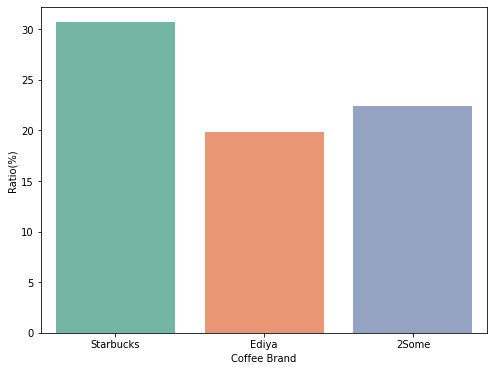

In [104]:
# 주요 3대 커피브랜드 서울 입점 비율을 시각화합니다.
top3_caffee = pd.DataFrame({'Coffee Brand' : ['Starbucks','Ediya','2Some'],
                            'Ratio(%)' : [30.688,19.856,22.444]})
plt.figure(figsize=(8,6))
sns.barplot(data=top3_caffee, x='Coffee Brand', y='Ratio(%)', palette='Set2')
plt.show()